In [1]:
import os
import numpy as np
import gdown
from pathlib import Path

import tensorflow as tf
from tensorflow import keras

In [2]:
url_path_map = {
        'train': {
            'url':'https://drive.google.com/uc?id=1JewlmOsqs-O1EmMMKutcYYiD7GkN6brN', 
            'path':'dataset/train.npy'
            },
        'test': {
            'url':'https://drive.google.com/uc?id=1JcCFZbc_N7VIa3G3XA8grwz4XGdaaXSZ', 
            'path':'dataset/test.npy'
            },
        'label': {
            'url':'https://drive.google.com/uc?id=1JiaTOcZ6QfDThw3RrIa3ZxDDaNt-BMUQ',
            'path':'dataset/label_info.txt'
        }
    }

In [3]:
def download_dataset():
    Path('dataset').mkdir(exist_ok=True)
    for split in ['train', 'test', 'label']:
        if Path(url_path_map[split]['path']).exists():
            continue
        gdown.download(url_path_map[split]['url'], url_path_map[split]['path'], quiet=False)

In [4]:
download_dataset()

Downloading...
From: https://drive.google.com/uc?id=1JewlmOsqs-O1EmMMKutcYYiD7GkN6brN
To: /content/dataset/train.npy
753MB [00:03, 230MB/s]
Downloading...
From: https://drive.google.com/uc?id=1JcCFZbc_N7VIa3G3XA8grwz4XGdaaXSZ
To: /content/dataset/test.npy
753MB [00:03, 231MB/s]
Downloading...
From: https://drive.google.com/uc?id=1JiaTOcZ6QfDThw3RrIa3ZxDDaNt-BMUQ
To: /content/dataset/label_info.txt
100%|██████████| 534/534 [00:00<00:00, 596kB/s]


In [5]:
def read_txt(file_name):
    with open(file_name, 'rt') as f:
        class_list = [row.strip('\n') for row in f.readlines()]
    return class_list

In [6]:
train_dir = '/content/dataset/train.npy'
test_dir = '/content/dataset/test.npy'
label_dir = '/content/dataset/label_info.txt'

In [7]:
train = np.load(train_dir, allow_pickle=True).item()
test = np.load(test_dir, allow_pickle=True).item()

In [8]:
train_image , train_label = train['image'], train['label']
test_image, test_label = test['image'], test['label']

In [9]:
train_image.shape, train_label.shape

((500, 224, 224, 30), (500,))

In [10]:
test_image.shape, test_label.shape

((500, 224, 224, 30), (500,))

In [11]:
train_image = np.split(train_image, 10, axis=3)
test_image = np.split(test_image, 10, axis=3)

In [12]:
train_image = np.array(train_image)
test_image = np.array(test_image)

In [13]:
train_image.shape, test_image.shape

((10, 500, 224, 224, 3), (10, 500, 224, 224, 3))

In [14]:
train_image = train_image.reshape((-1, 224, 224, 3))
test_image = test_image.reshape((-1, 224, 224, 3))

In [15]:
train_image.shape, test_image.shape

((5000, 224, 224, 3), (5000, 224, 224, 3))

In [16]:
label_temp = np.append(train_label, train_label) #2
label_temp = np.append(label_temp, label_temp) #4
label_temp = np.append(label_temp, label_temp) #8
label_temp = np.append(label_temp, train_label) #9
train_label_extended = np.append(label_temp, train_label) #10

In [17]:
train_label_extended.shape

(5000,)

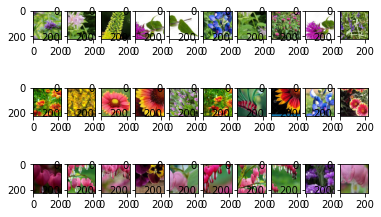

In [18]:
import matplotlib.pyplot as plt

#plt.figure(figsize=(3, 10))
for i in range(30):
  plt.subplot(3, 10, i+1)
  plt.imshow(train_image[i])

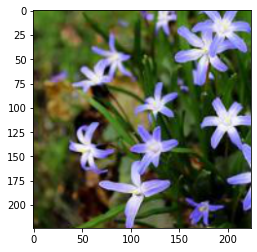

In [ ]:
plt.imshow(train_image[54])

In [ ]:
label_list = read_txt(label_dir)

In [ ]:
label_list

['Bergamot',
 'BlanketFlower',
 'BleedingHeart',
 'Bletilla',
 'Bluebonnets',
 'BluestarFlower',
 'Brassica',
 'Broom',
 'Calceolaria',
 'Celosia',
 'Chionodoxa',
 'CoralBells',
 'CuckooFlower',
 'Dietes',
 'DutchIris',
 'EnglishBluebell',
 'Eremurus',
 'FrangipaniFlower',
 'Fuchsia',
 'Guzmania',
 'Hebe',
 'Helenium',
 'Hellebore',
 'Honeysuckle',
 'Ixia',
 'Jacob’sLadder',
 'KangarooPaw',
 'Knautia',
 'Lewesia',
 'Lotus',
 'Meconopsis',
 'Mimosa',
 'MorningGlory',
 'NewZealandTeaTree',
 'OrientalLily',
 'Oxalis',
 'OysterPlant',
 'Pansy',
 'Photinia',
 'PincushionFlower',
 'Poinsettia',
 'Queen’sCup',
 'RockRose',
 'Scaevola',
 'ScentedGeranium',
 'Statice',
 'Tuberose',
 'UrnPlant',
 'VirginiaCreeper',
 'Winterberry']

In [19]:
train_image = train_image.astype('float32') / 255.0
test_image = test_image.astype('float32') / 255.0

In [20]:
from tensorflow.keras import models, layers

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D

In [22]:
model = models.Sequential()

In [23]:
model.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(units=50, activation='softmax'))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 43264)             0

In [25]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [26]:
model.fit(x=train_image, y=train_label_extended, epochs=30, batch_size=256, validation_split = 0.1)

Epoch 1/30
18/18 [==============================] - 24s 310ms/step - loss: 3.8330 - accuracy: 0.0491 - val_loss: 3.5947 - val_accuracy: 0.0940
Epoch 2/30
18/18 [==============================] - 3s 170ms/step - loss: 3.4962 - accuracy: 0.1304 - val_loss: 3.4877 - val_accuracy: 0.1380
Epoch 3/30
18/18 [==============================] - 3s 171ms/step - loss: 3.2393 - accuracy: 0.2104 - val_loss: 3.3526 - val_accuracy: 0.1880
Epoch 4/30
18/18 [==============================] - 3s 168ms/step - loss: 2.9473 - accuracy: 0.2933 - val_loss: 3.3183 - val_accuracy: 0.2200
Epoch 5/30
18/18 [==============================] - 3s 172ms/step - loss: 2.5380 - accuracy: 0.3824 - val_loss: 3.4668 - val_accuracy: 0.2020
Epoch 6/30
18/18 [==============================] - 3s 172ms/step - loss: 2.0940 - accuracy: 0.4889 - val_loss: 3.6463 - val_accuracy: 0.1900
Epoch 7/30
18/18 [==============================] - 3s 172ms/step - loss: 1.6301 - accuracy: 0.5933 - val_loss: 3.8651 - val_accuracy: 0.2180
Epoch

In [27]:
loss, accuracy = model.evaluate(x=train_image, y=train_label_extended)

157/157 [==============================] - 2s 11ms/step - loss: 0.6723 - accuracy: 0.8314


In [28]:
predictions = model.predict(test_image)

In [29]:
np.argmax(predictions[4999])

21

In [33]:
import pandas as pd

In [34]:
id=[]
pred=[]
for i in range(500):
  id.append(i)
  pred.append(np.argmax(predictions[i]))

In [35]:
challenge = pd.DataFrame({'image_id':id, 'label':pred})

In [36]:
challenge

,image_id,label
0,0,5
1,1,31
2,2,20
3,3,39
4,4,14
...,...,...
495,495,3
496,496,45
497,497,42
498,498,28


In [37]:
challenge.to_csv('deepChallenge07.csv', index=False)

In [43]:
id=[]
pred=[]
temp_list=[]
for i in range(500):
  id.append(i)
  j = i*10
  for x in range(10):
    now = j+x
    temp_list.append(np.argmax(predictions[now]))
    most_frequent = max(set(temp_list), key=temp_list.count)
  pred.append(most_frequent)
  temp_list.clear()

In [44]:
challenge = pd.DataFrame({'image_id':id, 'label':pred})

In [45]:
challenge

,image_id,label
0,0,31
1,1,32
2,2,4
3,3,44
4,4,7
...,...,...
495,495,2
496,496,47
497,497,29
498,498,2


In [46]:
challenge.to_csv('deepChallenge07_1.csv', index=False)

In [40]:
data=[1, 3, 3, 6, 6, 9, 5, 6]
most_frequent = max(set(data), key=data.count)